# Linear Regression

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [23]:
x = np.linspace(-3, 3, 100)
print('first 10 element of x is =',x[:10])
print()
print('Dimension of x is =', np.ndim(x))

first 10 element of x is = [-3.         -2.93939394 -2.87878788 -2.81818182 -2.75757576 -2.6969697
 -2.63636364 -2.57575758 -2.51515152 -2.45454545]

Dimension of x is = 1


In [37]:
rng = np.random.RandomState(42) #for making noise
y = np.sin(4*x) + x + rng.uniform(size= len(x))

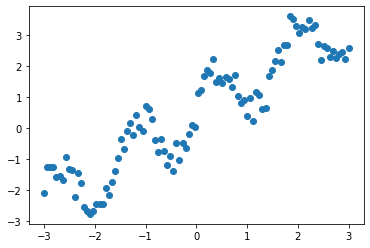

In [25]:
plt.plot(x, y, 'o');

In [26]:
# changing the shape of the x from 1D to 2D for using in sklearn
print('x before adding new axis', x.shape)
x = x[:, np.newaxis]
print('x after adding new axis', x.shape)

x before adding new axis (100,)
x after adding new axis (100, 1)


In [27]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [28]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [29]:
print('Weight=', regressor.coef_)
print('biyas=', regressor.intercept_)

Weight= [0.92429999]
biyas= 0.4925814788927694


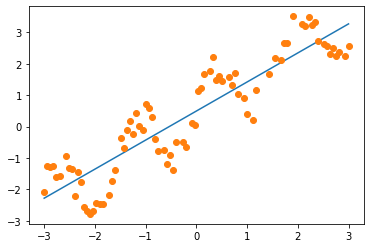

In [43]:
min_pt = x.min() * regressor.coef_[0]+ regressor.intercept_
max_pt = x.max() * regressor.coef_[0] + regressor.intercept_

plt.plot([x.min(), x.max()], [min_pt, max_pt])
plt.plot(x_train, y_train, 'o');

In [31]:
print(regressor.coef_[0])

0.9242999949284868


## Predicting on train data

In [32]:
y_pred_train = regressor.predict(x_train)

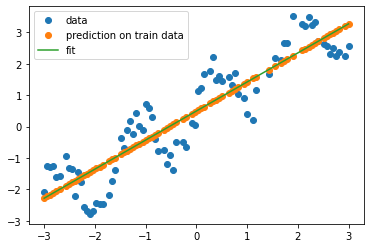

In [44]:
plt.plot(x_train, y_train, 'o', label= 'data')
plt.plot(x_train, y_pred_train, 'o', label='prediction on train data')
plt.plot([x.min(), x.max()], [min_pt, max_pt], label= 'fit')
plt.legend();

## Predicting on test data

In [34]:
y_pred_test = regressor.predict(x_test)

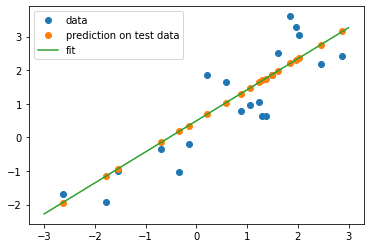

In [48]:
plt.plot(x_test, y_test, 'o', label= 'data')
plt.plot(x_test, y_pred_test, 'o', label='prediction on test data')
plt.plot([x.min(), x.max()], [min_pt, max_pt], label= 'fit')
plt.legend();

In [36]:
regressor.score(x_test, y_test)

0.7648375131196071

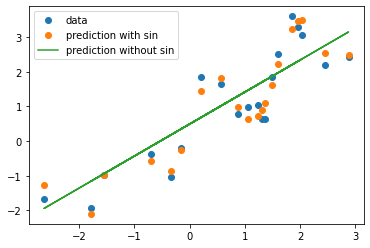

In [50]:
xx_train = np.concatenate((x_train, np.sin(4*x_train)), axis=1)
xx_test = np.concatenate((x_test, np.sin(4*x_test)), axis=1)

regressor.fit(xx_train, y_train)
y_pred_test_sin = regressor.predict(xx_test)

plt.plot(x_test, y_test, 'o', label='data')
plt.plot(x_test, y_pred_test_sin, 'o', label= 'prediction with sin')
plt.plot(x_test, y_pred_test, label='prediction without sin')
plt.legend();